In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

%matplotlib inline

In [2]:
tf.__version__

'2.14.0'

In [3]:
model = models.Sequential() 

model.add(layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(150, 150, 3)
))

model.add(layers.MaxPooling2D(
    pool_size=(2, 2)
))

model.add(layers.Flatten(
    
))

model.add(layers.Dense(
    units=64,
    activation='relu',
))

model.add(layers.Dense(
    units=1,
    activation='sigmoid',
))

optimizer = optimizers.SGD(
    learning_rate=0.002, 
    momentum=0.8
)

loss = losses.BinaryCrossentropy()

model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [5]:
gen = ImageDataGenerator(rescale=1./255)

train_ds = gen.flow_from_directory(
    'C:\dino-dragon\dataset\dstrain',
    target_size=(150, 150),  
    batch_size=20,
    class_mode='binary', 
    shuffle=True
)

test_ds = gen.flow_from_directory(
    'C:\dino-dragon\dataset\dstest',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [6]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [7]:
history = model.fit(
    train_ds, 
    epochs=10, 
    validation_data=test_ds
)

Epoch 1/10
80/80 [==============================] - 26s 322ms/step - loss: 0.6896 - accuracy: 0.5828 - val_loss: 0.6468 - val_accuracy: 0.6929
Epoch 2/10
80/80 [==============================] - 25s 311ms/step - loss: 0.5957 - accuracy: 0.7359 - val_loss: 0.5206 - val_accuracy: 0.8325
Epoch 3/10
80/80 [==============================] - 25s 312ms/step - loss: 0.4812 - accuracy: 0.8068 - val_loss: 0.5736 - val_accuracy: 0.6624
Epoch 4/10
80/80 [==============================] - 25s 312ms/step - loss: 0.4097 - accuracy: 0.8319 - val_loss: 0.4028 - val_accuracy: 0.8223
Epoch 5/10
80/80 [==============================] - 25s 308ms/step - loss: 0.3507 - accuracy: 0.8595 - val_loss: 0.3472 - val_accuracy: 0.8401
Epoch 6/10
80/80 [==============================] - 25s 312ms/step - loss: 0.3266 - accuracy: 0.8620 - val_loss: 0.4143 - val_accuracy: 0.8122
Epoch 7/10
80/80 [==============================] - 25s 311ms/step - loss: 0.2825 - accuracy: 0.8915 - val_loss: 0.3211 - val_accuracy: 0.8553

In [8]:
accuracy_values = history.history['accuracy']
loss_values = history.history['loss']

accuracy_median = np.median(accuracy_values)
loss_std = np.std(loss_values)

print('Медиана точности обучения по всем эпохам:', accuracy_median)
print('Стандартное отклонение потерь по всем эпохам:', loss_std)

Медиана точности обучения по всем эпохам: 0.8607277274131775
Стандартное отклонение потерь по всем эпохам: 0.15069221933249366


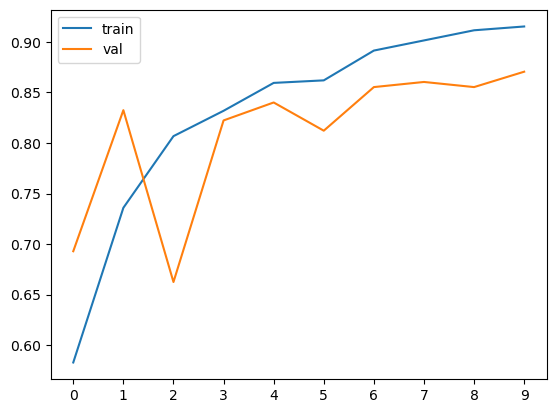

In [9]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [10]:
train_gen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2, 
    zoom_range=0.2,  
    horizontal_flip=True, 
    fill_mode='nearest' 
)


In [11]:
train_ds_aug = train_gen_aug.flow_from_directory(
    'C:\dino-dragon\dataset\dstrain',
    target_size=(150, 150),  
    batch_size=20,
    class_mode='binary',      
    shuffle=True
)

Found 1594 images belonging to 2 classes.


In [12]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    'dd_model_{epoch:02d}_{val_accuracy:.3f}.h5', 
    monitor='val_accuracy', 
    save_best_only=True, 
    mode='max'
)

In [13]:
history_aug = model.fit(
    train_ds_aug, 
    epochs=10, 
    validation_data=test_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
80/80 [==============================] - ETA: 0s - loss: 0.4418 - accuracy: 0.7986

c:\Users\ataha\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


80/80 [==============================] - 31s 382ms/step - loss: 0.4418 - accuracy: 0.7986 - val_loss: 0.4697 - val_accuracy: 0.7614
Epoch 2/10
80/80 [==============================] - 31s 384ms/step - loss: 0.4105 - accuracy: 0.8118 - val_loss: 0.2687 - val_accuracy: 0.8807
Epoch 3/10
80/80 [==============================] - 30s 369ms/step - loss: 0.4045 - accuracy: 0.8174 - val_loss: 0.3015 - val_accuracy: 0.8680
Epoch 4/10
80/80 [==============================] - 29s 365ms/step - loss: 0.3959 - accuracy: 0.8225 - val_loss: 0.6724 - val_accuracy: 0.7310
Epoch 5/10
80/80 [==============================] - 29s 367ms/step - loss: 0.4041 - accuracy: 0.8256 - val_loss: 0.4065 - val_accuracy: 0.8173
Epoch 6/10
80/80 [==============================] - 29s 367ms/step - loss: 0.3734 - accuracy: 0.8419 - val_loss: 0.2818 - val_accuracy: 0.8807
Epoch 7/10
80/80 [==============================] - 30s 376ms/step - loss: 0.3628 - accuracy: 0.8507 - val_loss: 0.3787 - val_accuracy: 0.8350
Epoch 8/10

In [14]:
accuracy_values_aug_5 = history_aug.history['accuracy'][-5:]
loss_values_aug = history_aug.history['loss']

accuracy_mean_aug_5 = np.mean(accuracy_values_aug_5)
loss_mean_aug = np.mean(loss_values_aug)

print('Среднее значение точности обучения за последние 5 эпох:', accuracy_mean_aug_5)
print('Среднее значение потерь по всем эпохам:', loss_mean_aug)

Среднее значение точности обучения за последние 5 эпох: 0.8469259738922119
Среднее значение потерь по всем эпохам: 0.3847714751958847


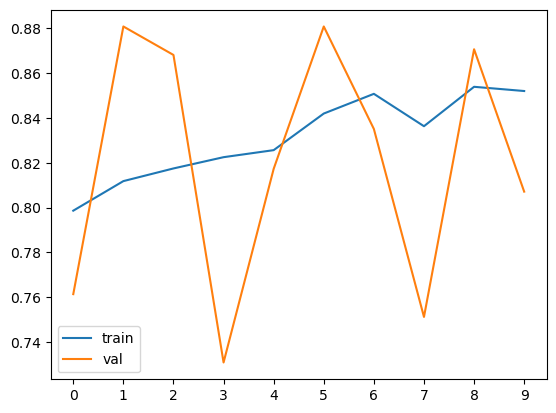

In [15]:
plt.plot(history_aug.history['accuracy'], label='train')
plt.plot(history_aug.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

Model testing

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import numpy as np
import requests
from PIL import Image
from io import BytesIO

In [20]:
ddmodel = load_model('dd_model_02_0.881.h5')

def model_predict(ddmodel, image_url):
    response = requests.get(image_url)
    image_data = response.content
    image = Image.open(BytesIO(image_data))
    image = image.resize((150, 150))

    x = keras.preprocessing.image.img_to_array(image)
    x = x / 255.0
    x = np.expand_dims(x, axis=0)

    prediction = ddmodel.predict(x)

    class_labels = {0: 'dino', 1: 'dragon'}
    predicted_class = 1 if prediction >= 0.5 else 0 
    predicted_label = class_labels[predicted_class]

    print(predicted_label)
    return image

1/1 [==============================] - 0s 30ms/step
dragon


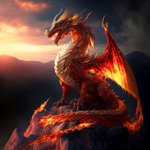

In [23]:
image_url = input('Пожалуйста, вставьте ссылку на изображение динозавра/дракона: ')

model_predict(ddmodel, image_url)